In [57]:
#import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg

In [58]:
# Imports various modules from the scikit-learn library 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [59]:
# Reads the CSV file called "fraud_oracle.csv"
df = pd.read_csv('fraud_oracle.csv', na_values='NaN')

In [60]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

# Preprocessing

In [62]:
df['PolicyNumber'].unique()

array([    1,     2,     3, ..., 15418, 15419, 15420], dtype=int64)

In [63]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

<Axes: >

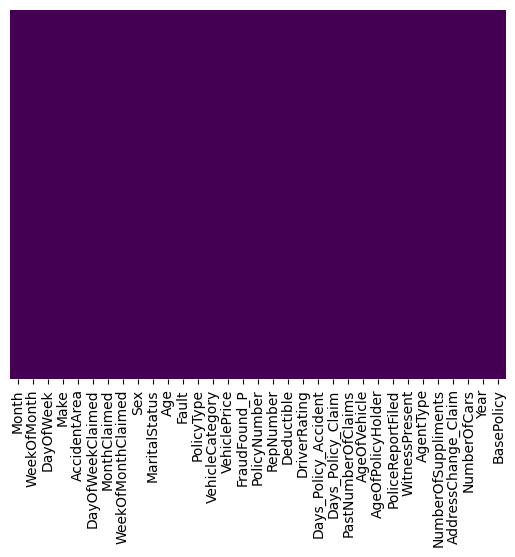

In [64]:
# Graphically show the null values in the columns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [65]:
# Drop "PolicyNumber" column
df=df.drop('PolicyNumber',axis=1)

In [66]:
# View the shape of the dataframe
df.shape

(15420, 32)

In [67]:
# View first 10 rows in the dataframe
df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [68]:
df[['Age','AgeOfPolicyHolder']].head(20)

,Age,AgeOfPolicyHolder
0,21,26 to 30
1,34,31 to 35
2,47,41 to 50
3,65,51 to 65
4,27,31 to 35
5,20,21 to 25
6,36,36 to 40
7,0,16 to 17
8,30,31 to 35
9,42,36 to 40


In [69]:
df[['Age', 'DayOfWeekClaimed', 'MonthClaimed']] = df[['Age', 'DayOfWeekClaimed', 'MonthClaimed']].replace(0, np.nan)

In [70]:
df[['Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','NumberOfSuppliments']] = df[['Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','NumberOfSuppliments']].replace('none', '0')
df['AgeOfVehicle'] = df['AgeOfVehicle'].replace('new', '0')
df['AddressChange_Claim'] = df['AddressChange_Claim'].replace('new', '0')

In [71]:
pattern = r'(\d+)'
columns = ['NumberOfCars','NumberOfSuppliments','AgeOfPolicyHolder','AgeOfVehicle','PastNumberOfClaims', 'Days_Policy_Claim', 'Days_Policy_Accident', 'VehiclePrice']
for column in columns:
    # Convert the column to string type
    df[column] = df[column].astype(str)
    
    # Use regex to extract the first number from each value
    df[column] = df[column].str.extract(pattern, expand=False)

In [72]:
df[['NumberOfCars','NumberOfSuppliments','AgeOfPolicyHolder','AgeOfVehicle','PastNumberOfClaims', 'Days_Policy_Claim', 'Days_Policy_Accident', 'VehiclePrice']] = df[['NumberOfCars','NumberOfSuppliments','AgeOfPolicyHolder','AgeOfVehicle','PastNumberOfClaims', 'Days_Policy_Claim', 'Days_Policy_Accident', 'VehiclePrice']].astype('int')

In [73]:
# Checking unique values in "FraudFound_P" column
df['FraudFound_P'].unique()

array([0, 1], dtype=int64)

In [74]:
# Checking unique values in "MaritalStatus" column
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Widow', 'Divorced'], dtype=object)

<Axes: xlabel='FraudFound_P', ylabel='count'>

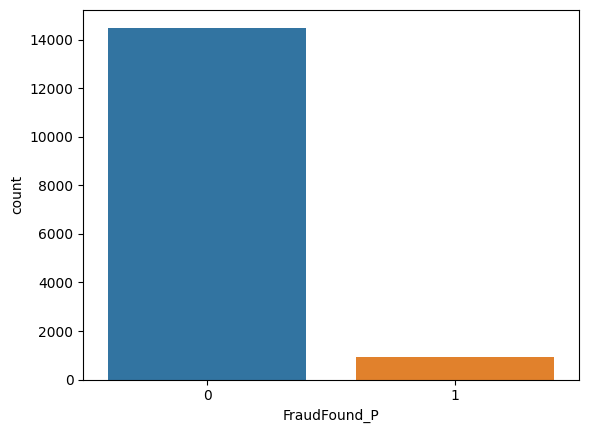

In [75]:
# Plot the count of each value in the "FraudFound_P" column 
sns.countplot(x='FraudFound_P', data=df)

<Axes: xlabel='MaritalStatus', ylabel='count'>

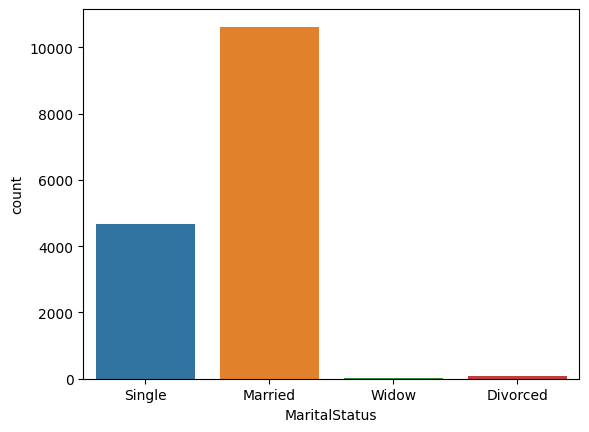

In [76]:
# Plot the count of each value in the "MaritalStatus" 
sns.countplot(x='MaritalStatus', data=df)

In [77]:
# Checking unique values in "Fault" column
df['Fault'].unique()

array(['Policy Holder', 'Third Party'], dtype=object)

<Axes: xlabel='FraudFound_P', ylabel='count'>

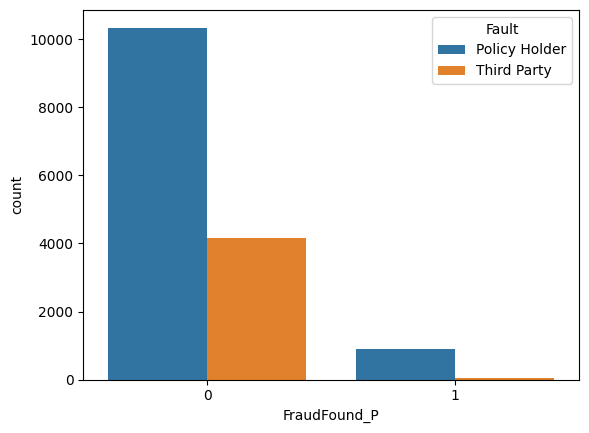

In [78]:
# Using Seaborn to create a countplot showing the relationship between FraudFound_P and Fault
sns.countplot(x='FraudFound_P' ,hue='Fault',data=df)

In [79]:
# Count the number of unique categories in the "Fault" column
len(df['Fault'].value_counts())

2

In [80]:
# Count the number of unique values in the "Fault" column
df['Fault'].value_counts()

Fault
Policy Holder    11230
Third Party       4190
Name: count, dtype: int64

<Axes: xlabel='FraudFound_P', ylabel='count'>

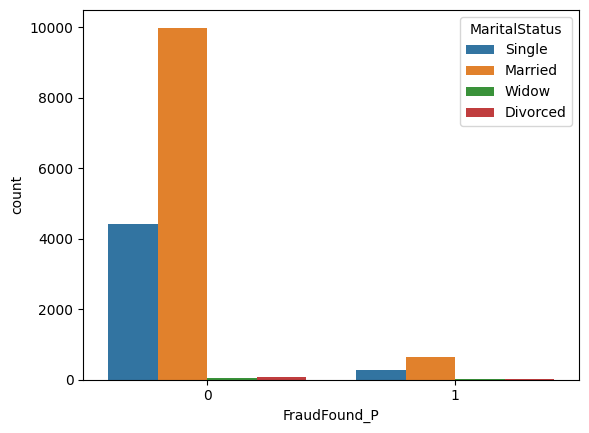

In [81]:
# Using Seaborn to create a countplot showing the relationship between "FraudFound_P" and "MaritalStatus"
sns.countplot(x='FraudFound_P' ,hue='MaritalStatus',data=df)

In [82]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3,26,No,No,External,0,1 year,3,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6,31,Yes,No,External,0,no change,1,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7,41,No,No,External,0,no change,1,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,7,51,Yes,No,External,5,no change,1,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5,31,No,No,External,0,no change,1,1994,Collision


In [83]:
# Count the number of unique values in the "DayOfWeek" column
df['DayOfWeek'].value_counts()

DayOfWeek
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: count, dtype: int64

<Axes: xlabel='FraudFound_P', ylabel='count'>

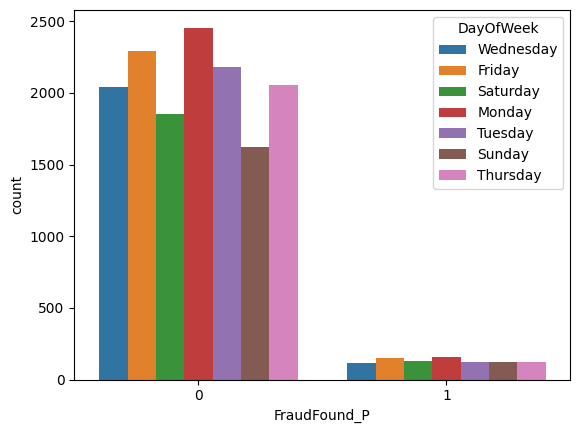

In [84]:
# Using Seaborn to create a countplot showing the relationship between "FraudFound_P" and "DayOfWeek"
sns.countplot(x='FraudFound_P' ,hue='DayOfWeek',data=df)

In [85]:
# Check the shape of dataframe after preprocessing
df.shape

(15420, 32)

In [86]:
# Check for null values and data types after preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15100 non-null  float64
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  int32  
 15  FraudFound_P       

## Hypothesis Testing


In [87]:
def plot_countplot_with_labels(data, x, hue):
    # Create the countplot
    ax = sns.countplot(data=df, x=x, hue=hue)

    # Add labels to the top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(height, (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

    # Display the plot
    plt.show()

In [88]:
df = df.dropna()

<Axes: xlabel='FraudFound_P', ylabel='Count'>

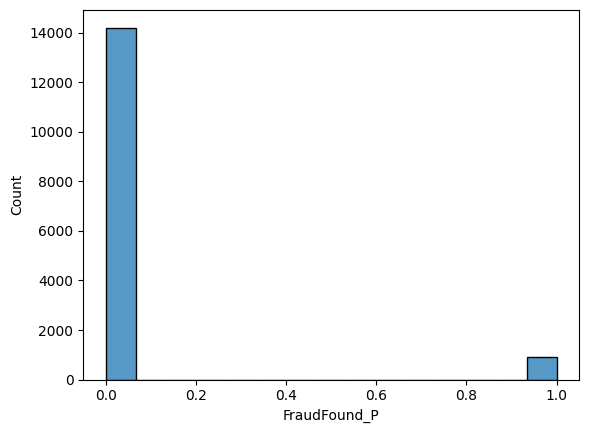

In [89]:
sns.histplot(data=df, x="FraudFound_P")

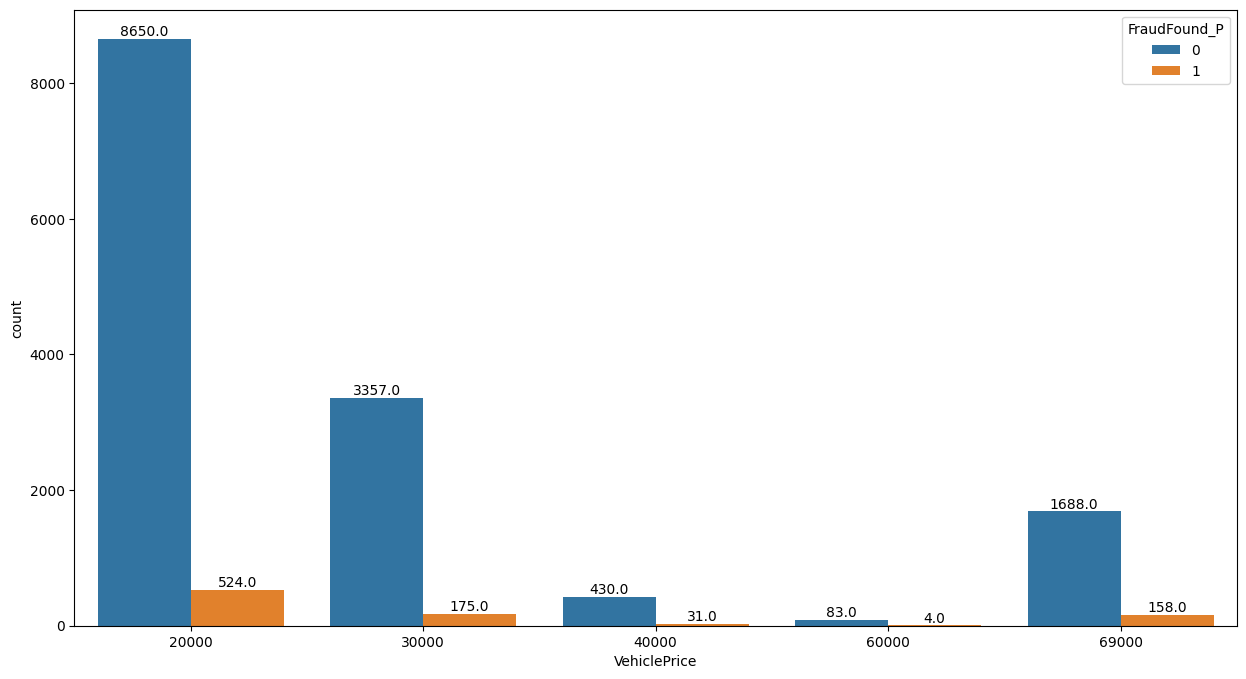

In [90]:
plt.figure(figsize=(15,8))
plot_countplot_with_labels(data=df, x="VehiclePrice", hue="FraudFound_P")

<Axes: xlabel='FraudFound_P', ylabel='Days_Policy_Accident'>

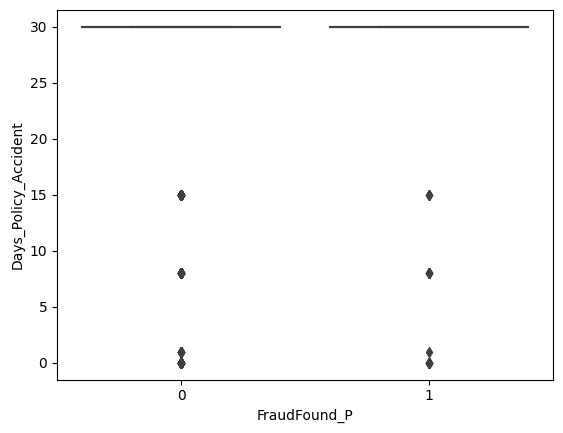

In [91]:
sns.boxplot( y=df["Days_Policy_Accident"], x=df["FraudFound_P"])

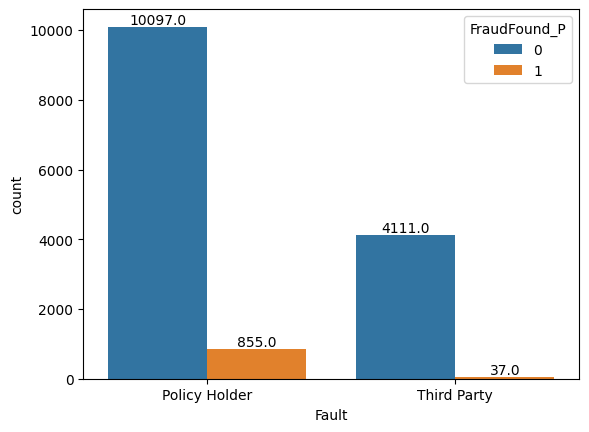

In [92]:
plot_countplot_with_labels(data=df, x="Fault", hue="FraudFound_P")

<Axes: xlabel='FraudFound_P', ylabel='DriverRating'>

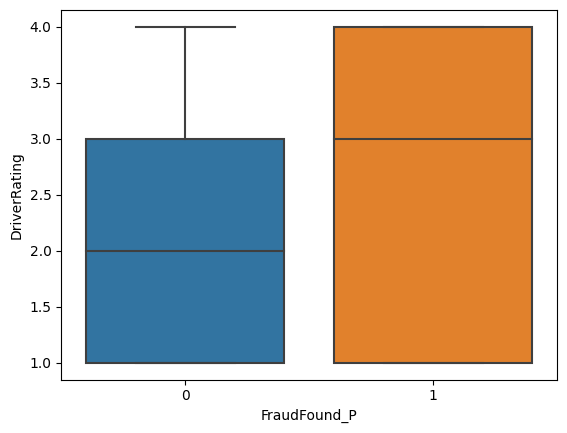

In [93]:
sns.boxplot( y=df["DriverRating"], x=df["FraudFound_P"])

<Axes: xlabel='FraudFound_P', ylabel='AgeOfVehicle'>

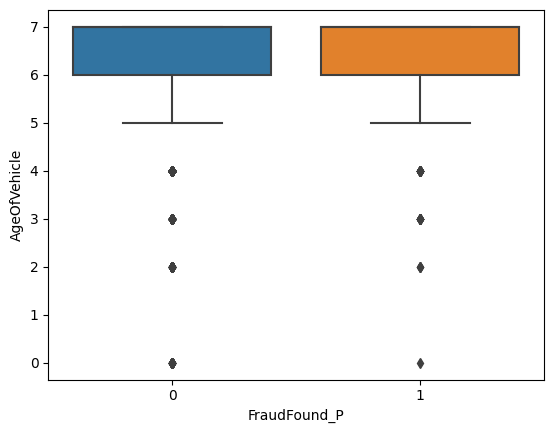

In [94]:
sns.boxplot( y=df["AgeOfVehicle"], x=df["FraudFound_P"])

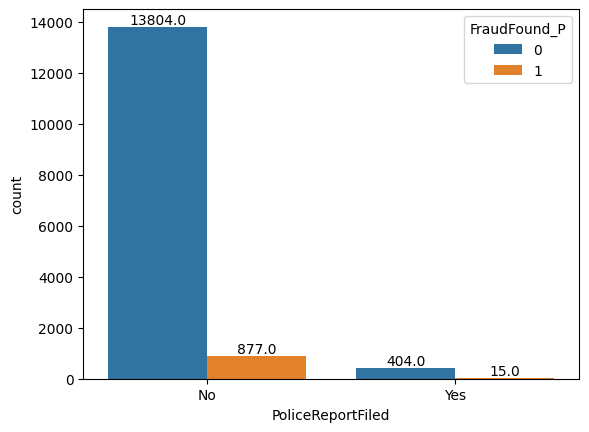

In [95]:
plot_countplot_with_labels(data=df, x="PoliceReportFiled", hue="FraudFound_P")

# Feature Separation and Train/Test Split

In [96]:
# Creating a list of categorical features
cat_features = ["Month", "DayOfWeek", "Make", "AccidentArea", "DayOfWeekClaimed", "MonthClaimed", "Sex", "MaritalStatus", "Fault", "PolicyType", "VehicleCategory", "PoliceReportFiled", "WitnessPresent", "AgentType", "AddressChange_Claim", "BasePolicy"]

# One-hot encoding the categorical features
ddf = pd.get_dummies(df, columns=cat_features)

# Separating the features and the target variable
X = ddf.drop("FraudFound_P", axis=1)
y = ddf["FraudFound_P"]

# Creating a list of classifiers
classifiers = [LogisticRegression(max_iter=1000), SVC(max_iter=1000), DecisionTreeClassifier(), RandomForestClassifier()]

# Creating a stratified k-fold object with 5 splits
skf = StratifiedKFold(n_splits=5)

# Looping over the classifiers
for clf in classifiers:
    # Initializing empty lists to store the evaluation metrics for each fold
    accuracies = []
    precisions = []
    recalls = []

    # Looping over the train and test indices of each fold
    for train_index, test_index in skf.split(X, y):
        # Splitting the data into train and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fitting the classifier on the train set
        clf.fit(X_train, y_train)
        # Predicting on the test set
        y_pred = clf.predict(X_test)
        # Calculating the evaluation metrics and appending them to the respective lists
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)

    # Printing the mean and standard deviation of the evaluation metrics for each classifier
    print(f"{clf.__class__.__name__}: Accuracy={np.mean(accuracies):.3f} (+/- {np.std(accuracies):.3f}), Precision={np.mean(precisions):.3f} (+/- {np.std(precisions):.3f}), Recall={np.mean(recalls):.3f} (+/- {np.std(recalls):.3f})")


LogisticRegression: Accuracy=0.941 (+/- 0.000), Precision=0.000 (+/- 0.000), Recall=0.000 (+/- 0.000)


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC: Accuracy=0.941 (+/- 0.000), Precision=0.000 (+/- 0.000), Recall=0.000 (+/- 0.000)
DecisionTreeClassifier: Accuracy=0.893 (+/- 0.006), Precision=0.126 (+/- 0.038), Recall=0.136 (+/- 0.035)
RandomForestClassifier: Accuracy=0.942 (+/- 0.001), Precision=0.975 (+/- 0.050), Recall=0.019 (+/- 0.011)


In [97]:
# Define categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.8, random_state=123)

models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(x_train, y_train)

In [98]:
# Providing model names to show the results
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "         Random Forest"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(x_test, y_test) * 100))

   Logistic Regression: 94.1887%
Support Vector Machine: 94.1887%
         Decision Tree: 87.8560%
         Random Forest: 93.9901%


# Hyperparameter Tuning 

## 1. LogisticRegression

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11378
           1       0.00      0.00      0.00       702

    accuracy                           0.94     12080
   macro avg       0.47      0.50      0.49     12080
weighted avg       0.89      0.94      0.91     12080

Confusion:
[[11378     0]
 [  702     0]]


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sk

Text(113.9222222222222, 0.5, 'Predicted Class')

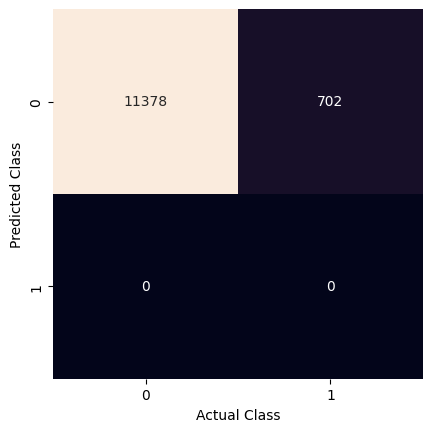

In [99]:
# Define logistic regression model
logreg = LogisticRegression(random_state=123)

# Define hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2']}

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Fit GridSearchCV object to training data
grid_search.fit(x_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("")

# Make predictions on test data using best estimator
logreg_best = grid_search.best_estimator_
log_prediction = logreg_best.predict(x_test)

# Print classification report and confusuin matrix
print(classification_report(y_test, log_prediction))
print("Confusion:")
cm = confusion_matrix(y_test, log_prediction)
print(cm)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

## 2. Support Vector Machine

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11378
           1       0.00      0.00      0.00       702

    accuracy                           0.94     12080
   macro avg       0.47      0.50      0.49     12080
weighted avg       0.89      0.94      0.91     12080

Confusion Matrix:
[[11378     0]
 [  702     0]]


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

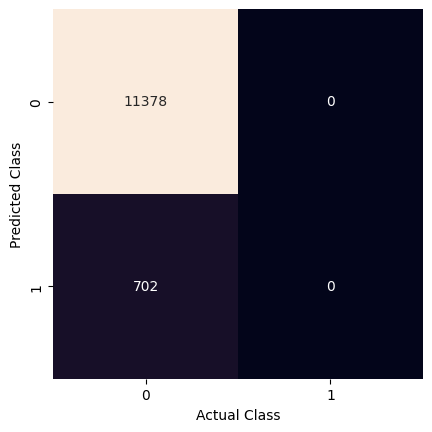

In [100]:
# Define SVM model
svm = SVC(random_state=123)

# Define hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

# Create GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit GridSearchCV object to training data
grid_search.fit(x_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("")

# Make predictions on test data using best estimator
svm_best = grid_search.best_estimator_
svm_prediction = svm_best.predict(x_test)

# Print classification report and confusion matrix
print(classification_report(y_test, svm_prediction))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, svm_prediction)
print(cm)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()

## 3. Decision Tree

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11378
           1       0.00      0.00      0.00       702

    accuracy                           0.94     12080
   macro avg       0.47      0.50      0.49     12080
weighted avg       0.89      0.94      0.91     12080

Confusion:
[[11378     0]
 [  702     0]]


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Text(113.9222222222222, 0.5, 'Predicted Class')

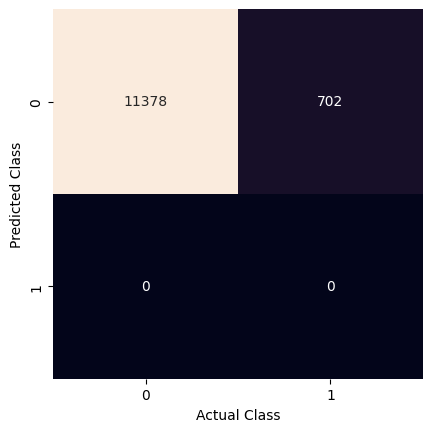

In [101]:
# Define the hyperparameter grid to search
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a DecisionTreeClassifier object with random_state=123
dtc = DecisionTreeClassifier(random_state=123)

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("")

# Make predictions on the test data using the best estimator
dtc_best = grid_search.best_estimator_
dtc_prediction = dtc_best.predict(x_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, dtc_prediction))
print("Confusion:")
cm = confusion_matrix(y_test, dtc_prediction)
print(cm)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

## 4. Random Forest

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11378
           1       0.00      0.00      0.00       702

    accuracy                           0.94     12080
   macro avg       0.47      0.50      0.49     12080
weighted avg       0.89      0.94      0.91     12080

Confusion:
[[11378     0]
 [  702     0]]


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Text(113.9222222222222, 0.5, 'Predicted Class')

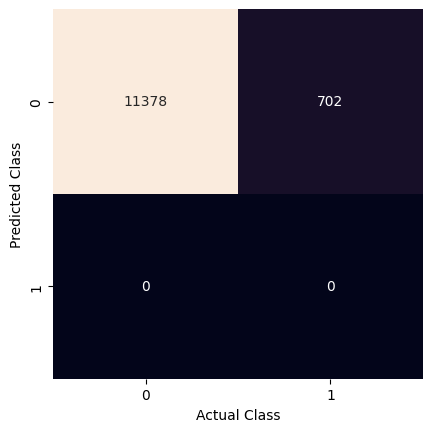

In [102]:
# Define the hyperparameter grid to search
param_grid = {'n_estimators': [100, 300, 500],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a RandomForestClassifier object with random_state=123
rfc = RandomForestClassifier(random_state=123)

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("")

# Make predictions on the test data using the best estimator
rfc_best = grid_search.best_estimator_
rfc_prediction = rfc_best.predict(x_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, rfc_prediction))
print("Confusion:")
cm = confusion_matrix(y_test, rfc_prediction)
print(cm)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

## Comparison of Models

In [103]:
report = [
    ["Logistic Regression", 0.941, 0.000, 0.000],
    ["Support Vector Machine", 0.941, 0.000, 0.000],
    ["Decision Tree", 0.894, 0.125, 0.131],
    ["Random Forest", 0.942, 0.905, 0.016]
]

result = pd.DataFrame(report, columns=["Model", "Accuracy Score", "Precision", "Recall"])
result_sorted = result.sort_values("Accuracy Score", ascending=False)

print(result_sorted)

                    Model  Accuracy Score  Precision  Recall
3           Random Forest           0.942      0.905   0.016
0     Logistic Regression           0.941      0.000   0.000
1  Support Vector Machine           0.941      0.000   0.000
2           Decision Tree           0.894      0.125   0.131
